# weatherPy #

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linregress
from scipy.stats import linregress

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [3]:
# Output File (CSV)
output_data_file = "weather_data/weather_df.csv"

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

In [6]:
cities = []
lat_lngs=[]

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [9]:
# Create a list for holding the cities.
units = "Imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
# Starting URL for Weather Map API Call.
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [10]:
# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# define count of pass throughs
record_count = 1
set_count = 1
# Loop through all the cities in our list.
#for i in range(len(cities)):

print("Beginning Data Retrieval     ")
print("***********************")
   

Beginning Data Retrieval     
***********************


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Create endpoint URL with each city.
    city_url = query_url + city
    
# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
# Parse the JSON and retrieve data.
        response = requests.get(city_url).json()
# Parse out the needed data.
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        #to alleviate getting locked
        time.sleep(2) 
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
    

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("*****************************")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | harper
Processing Record 4 of Set 1 | zhangjiakou
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | snezhnogorsk
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | tsihombe
City not found. Ski

Processing Record 37 of Set 4 | xuddur
Processing Record 38 of Set 4 | saleaula
City not found. Skipping...
Processing Record 39 of Set 4 | nuevo ideal
Processing Record 40 of Set 4 | russellville
Processing Record 41 of Set 4 | chahal
Processing Record 42 of Set 4 | mecca
Processing Record 43 of Set 4 | lindi
Processing Record 44 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | meadow lake
Processing Record 47 of Set 4 | akyab
Processing Record 48 of Set 4 | satitoa
City not found. Skipping...
Processing Record 49 of Set 4 | ketchikan
Processing Record 0 of Set 5 | pedreiras
Processing Record 1 of Set 5 | tolaga bay
Processing Record 2 of Set 5 | samfya
Processing Record 3 of Set 5 | barrhead
Processing Record 4 of Set 5 | cabras
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | tabuk
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | b

Processing Record 25 of Set 8 | san pedro
Processing Record 26 of Set 8 | mudgee
Processing Record 27 of Set 8 | bharatpur
Processing Record 28 of Set 8 | hobyo
Processing Record 29 of Set 8 | ferrol
Processing Record 30 of Set 8 | hailar
Processing Record 31 of Set 8 | kielce
Processing Record 32 of Set 8 | tawkar
City not found. Skipping...
Processing Record 33 of Set 8 | vermilion
Processing Record 34 of Set 8 | beruwala
Processing Record 35 of Set 8 | kaniama
Processing Record 36 of Set 8 | mookane
Processing Record 37 of Set 8 | muros
Processing Record 38 of Set 8 | villa bruzual
Processing Record 39 of Set 8 | saskylakh
Processing Record 40 of Set 8 | kalmunai
Processing Record 41 of Set 8 | tucuman
Processing Record 42 of Set 8 | ituni
City not found. Skipping...
Processing Record 43 of Set 8 | bowen
Processing Record 44 of Set 8 | palana
Processing Record 45 of Set 8 | wooster
Processing Record 46 of Set 8 | guozhen
Processing Record 47 of Set 8 | ostrovskoye
Processing Record 

Processing Record 12 of Set 12 | vargashi
Processing Record 13 of Set 12 | aranos
Processing Record 14 of Set 12 | vardo
Processing Record 15 of Set 12 | idrinskoye
Processing Record 16 of Set 12 | carutapera
Processing Record 17 of Set 12 | kampot
Processing Record 18 of Set 12 | troitskoye
Processing Record 19 of Set 12 | ko samui
Processing Record 20 of Set 12 | pula
Processing Record 21 of Set 12 | mandalgovi
Processing Record 22 of Set 12 | carberry
Processing Record 23 of Set 12 | finschhafen
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | molde
Processing Record 26 of Set 12 | mumford
Processing Record 27 of Set 12 | dniprorudne
Processing Record 28 of Set 12 | albufeira
Processing Record 29 of Set 12 | athabasca
Processing Record 30 of Set 12 | coquimbo
Processing Record 31 of Set 12 | kalutara
Processing Record 32 of Set 12 | choya
Processing Record 33 of Set 12 | tucuma
Processing Record 34 of Set 12 | cuichapa
Processing Record 35 of Set 12 | mbanza-n

In [12]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    }

weather_df = pd.DataFrame(city_data_df)
weather_df.head(10)

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Cloudiness,Wind Speed
0,Avarua,CK,1638654016,83,-21.2078,-159.7750,78.85,40,5.75
1,Punta Arenas,CL,1638653661,50,-53.1500,-70.9167,55.51,40,25.32
2,Harper,LR,1638654020,81,4.3750,-7.7169,79.90,6,8.05
3,Zhangjiakou,CN,1638654023,45,40.8100,114.8794,28.35,0,0.27
4,Arraial do Cabo,BR,1638654025,69,-22.9661,-42.0278,76.96,40,10.36
5,Carnarvon,AU,1638654028,94,-24.8667,113.6333,69.87,0,5.75
6,Rikitea,PF,1638653748,71,-23.1203,-134.9692,76.06,40,10.00
7,Vaini,TO,1638653867,78,-21.2000,-175.2000,82.56,40,13.80
8,Busselton,AU,1638653838,68,-33.6500,115.3333,56.08,1,10.65
9,Puerto Ayora,EC,1638653688,83,-0.7393,-90.3518,75.16,78,7.70


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Exporting the city data to .csv file:

weather_df.to_csv("weather_database/WeatherPy_database.csv", index=False, header=True)
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

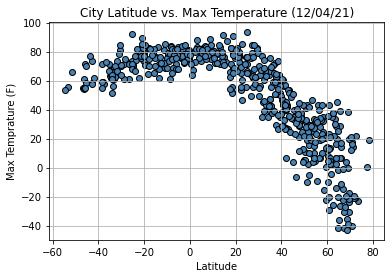

In [36]:
# Import time module
import time

# Plot 1: Latitude vs. Temperature Plot
x_values = lats
y_values = max_temps

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

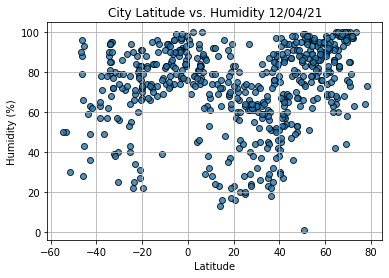

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/cityLatitudeVsHumidity.png")
# Show plot.
plt.show()

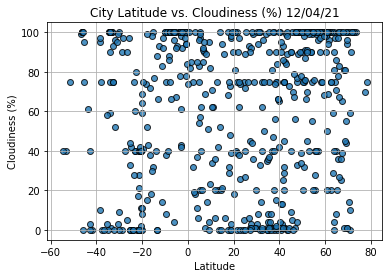

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/CityLatitudeVSCloudiness.png")
# Show plot.
plt.show()


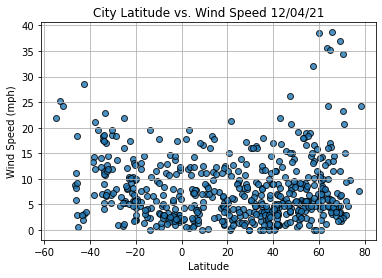

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/CityLatitudeVSWindSpeed.png")
# Show plot.
plt.show()

# Linear regression
'

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [20]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]


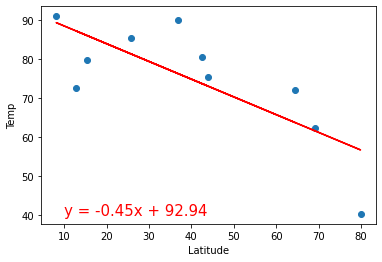

In [21]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [22]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemi_df = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi_df = weather_df.loc[weather_df["Lat"] < 0]


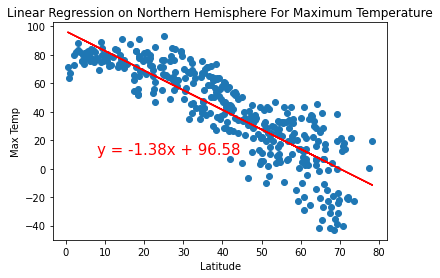

In [23]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(north_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot and plot of regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Northern Hemisphere For Maximum Temperature')


plt.savefig("weather_data/Max_Temp_Northern_Hem.png")
plt.show() 

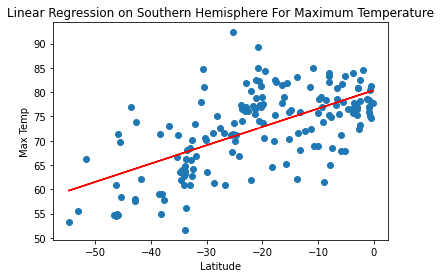

In [24]:

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(south_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot and plot of regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-90,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Southern Hemisphere For Maximum Temperature')


plt.savefig("weather_data/Max_Temp_Northern_Hem.png")
plt.show() 
 

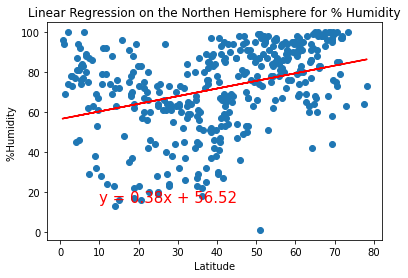

In [25]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(north_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot and plot of regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('%Humidity ')
plt.title('Linear Regression on the Northen Hemisphere for % Humidity')


plt.savefig("weather_data/northLinear_Regression_humidity")
plt.show() 

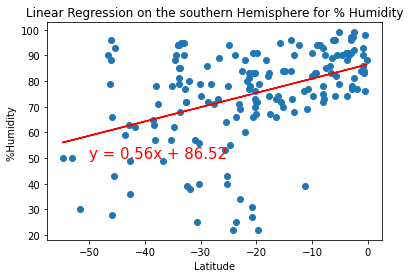

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(south_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot and plot of regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('%Humidity ')
plt.title('Linear Regression on the southern Hemisphere for % Humidity')


plt.savefig("weather_data/southLinear_Regression_humidity")
plt.show() 




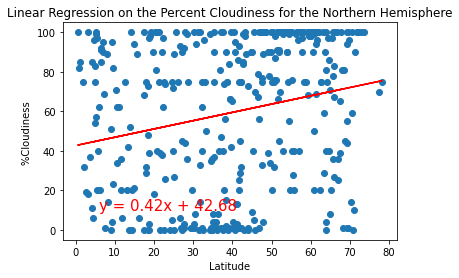

In [27]:
# Linear Regression on the Percent Cloudiness for the Northern Hemisphere


x_values = pd.to_numeric(north_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(north_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#create scatter plot and plot of regression line

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('%Cloudiness ')
plt.title('Linear Regression on the Percent Cloudiness for the Northern Hemisphere')


plt.savefig("weather_data/cloudinessNorth.png")
plt.show() 

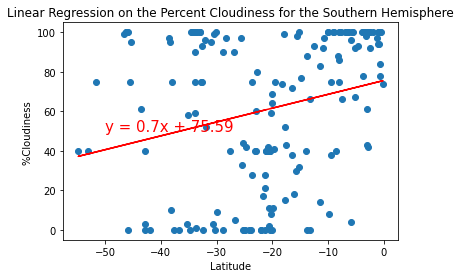

In [28]:
# Linear Regression on the Percent Cloudiness for the south Hemisphere


x_values = pd.to_numeric(south_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(south_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('%Cloudiness ')
plt.title('Linear Regression on the Percent Cloudiness for the Southern Hemisphere')



plt.savefig("weather_data/cloudinesssouth.png")
plt.show() 

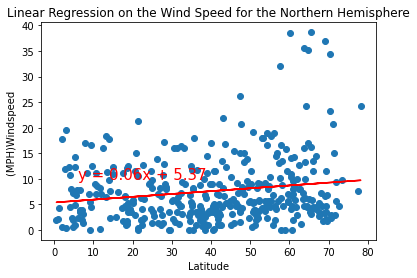

In [29]:
# Linear Regression on the Wind Speed for the Northern Hemisphere


x_values = pd.to_numeric(north_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(north_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#create scatter plot and plot of regression line

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('(MPH)Windspeed ')
plt.title('Linear Regression on the Wind Speed for the Northern Hemisphere')


plt.savefig("weather_data/cloudinessNorth.png")
plt.show() 

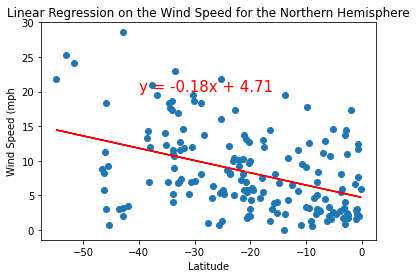

In [30]:
# Linear Regression on the Wind Speed for the Northern Hemisphere
x_values = pd.to_numeric(south_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(south_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot and plot of regression line

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Linear Regression on the Wind Speed for the Northern Hemisphere')

plt.savefig("weather_data/windregressionsouth.png")
plt.show() 